# Decision Tree

## Housing Case Study

#### Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —


- To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

- To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

- To know the accuracy of the model, i.e. how well these variables can predict house prices.

**So interpretation is important!**

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the housing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
# read the data
housing = pd.read_csv('https://raw.githubusercontent.com/shinde-chandrakant/housing-price-prediction/master/Housing.csv')

In [4]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# lets look at shape
housing.shape

(545, 13)

In [6]:
# lets see missing value
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# stats
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

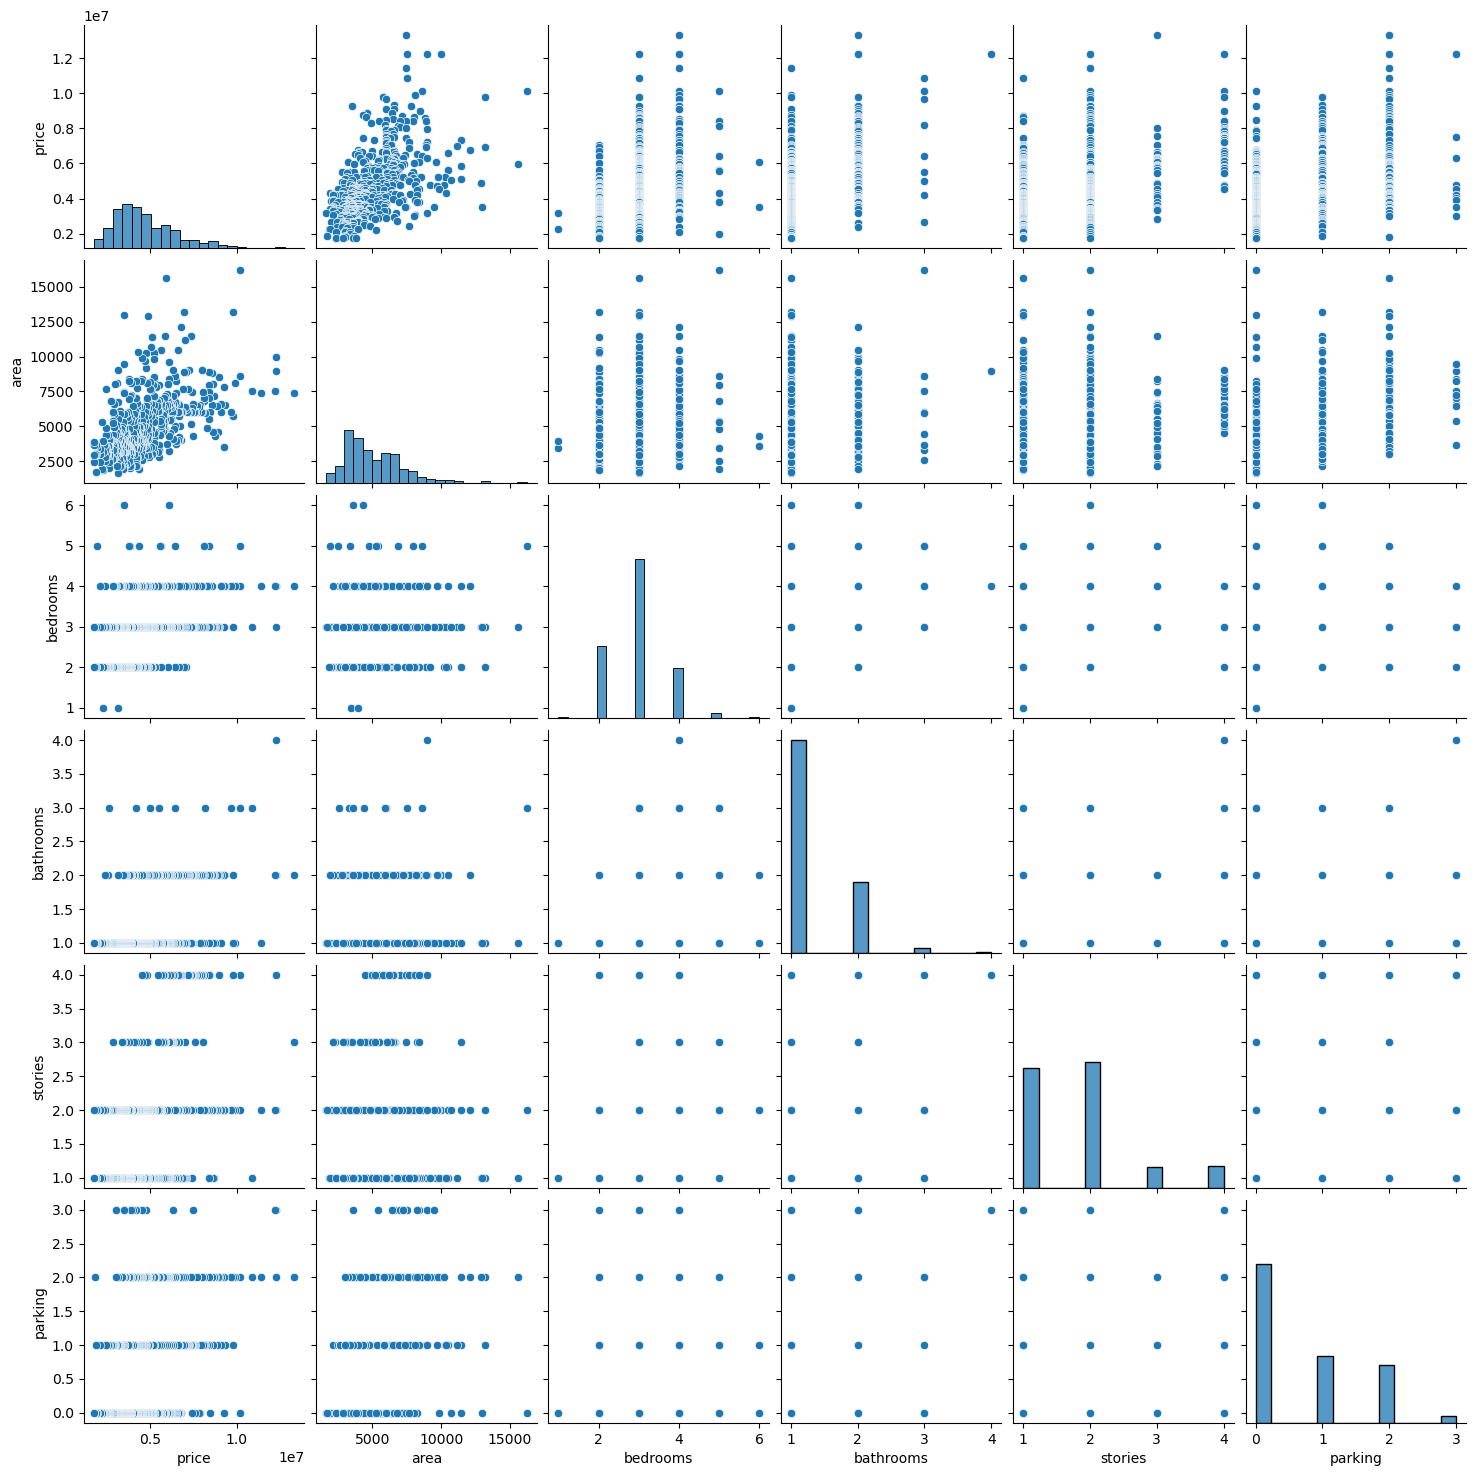

In [9]:
sns.pairplot(data = housing)
plt.show()

#### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

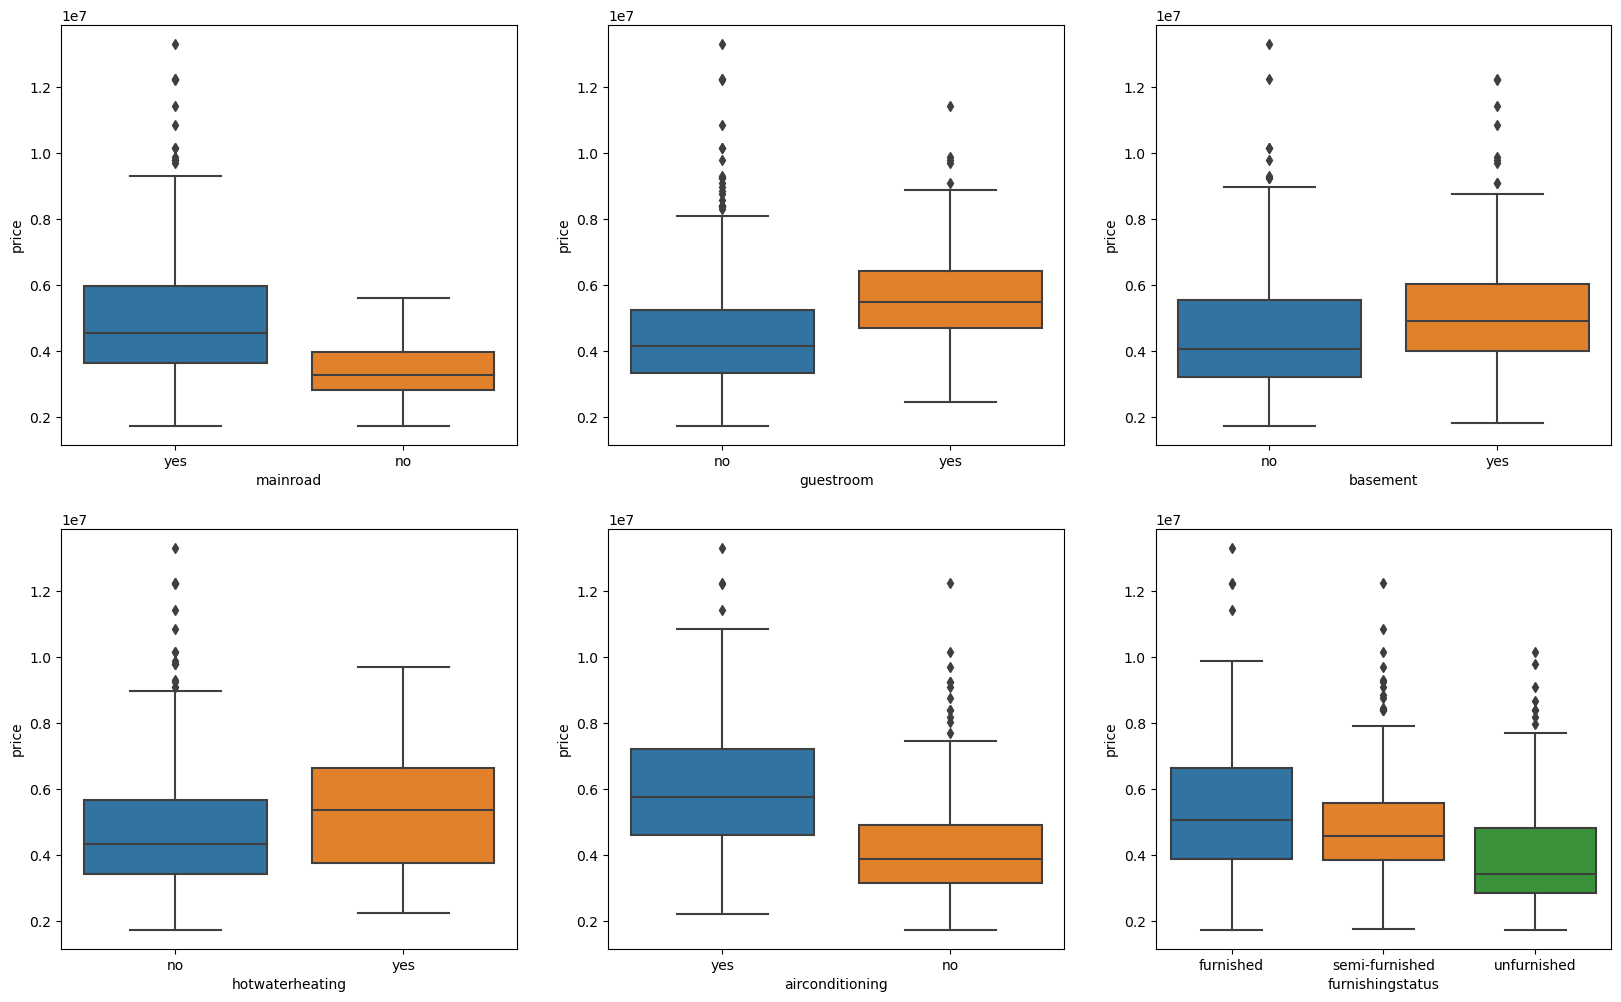

In [10]:
# visualising the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

##### <font color='red'>Inferences:</font>
- Price seems to be high if
    - Property is nearyby mainroad, 
    - Guest room is present,
    - Basement is attached,
    - Water Heating fascility is persent,
    - Airconditioning is available,
    - High for furnished property.

We can also visualise some of these categorical features parallely by using the `hue` argument. Below is the plot for `furnishingstatus` with `airconditioning` as the hue.

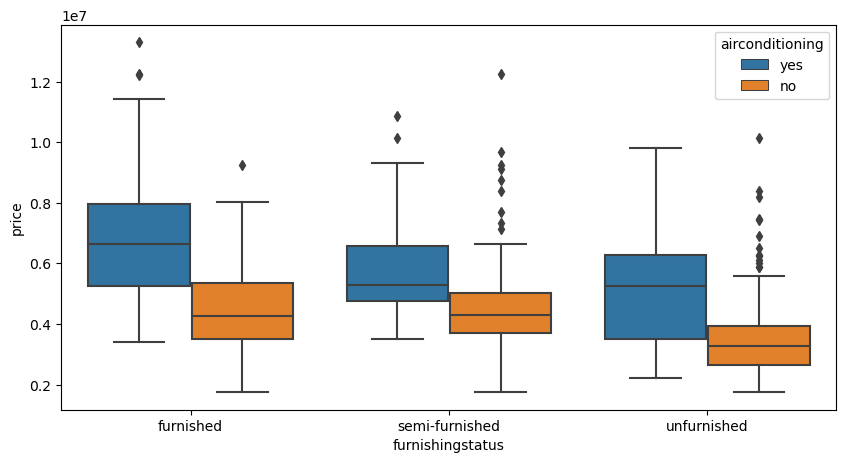

In [11]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=housing, x='furnishingstatus', y='price', hue='airconditioning')
plt.show()

## Step 3: Data Preparation

- You can see that your dataset has many columns with values as 'Yes' or 'No'.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

- Encocding:
    - Converting binary vars to 1/0
    - Other categorical vars to dummy vars

In [27]:
# yes/no varibles
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes':1, 'no':0}))

housing[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


### Dummy Variables

The variable `furnishingstatus` has three levels. We need to convert these levels into integer as well. 

For this, we will use something called `dummy variables`.

Now, you don't need three columns. You can drop the `furnished` column, as the type of furnishing can be identified with just the last two columns where — 
- `00` will correspond to `furnished`
- `01` will correspond to `unfurnished`
- `10` will correspond to `semi-furnished`

In [28]:
# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(housing.furnishingstatus, drop_first=True)

In [29]:
# concat dummy df with original one
housing = pd.concat([housing, status], axis =1)
housing.drop('furnishingstatus', axis=1, inplace=True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [32]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [34]:
df_train.shape, df_test.shape

((381, 14), (164, 14))

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
df_train['price'] = scaler.fit_transform(df_train[['price']])
df_test['price'] = scaler.transform(df_test[['price']])

In [38]:
df_train.price.describe()

count    381.000000
mean       0.260333
std        0.157607
min        0.000000
25%        0.151515
50%        0.221212
75%        0.345455
max        1.000000
Name: price, dtype: float64

In [39]:
y_train = df_train.pop("price")
X_train = df_train

y_test = df_test.pop("price")
X_test = df_test

In [40]:
df_train.shape, df_test.shape

((381, 13), (164, 13))

## Step 5: Decision Tree Model building

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)

In [43]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

In [45]:
from sklearn import tree

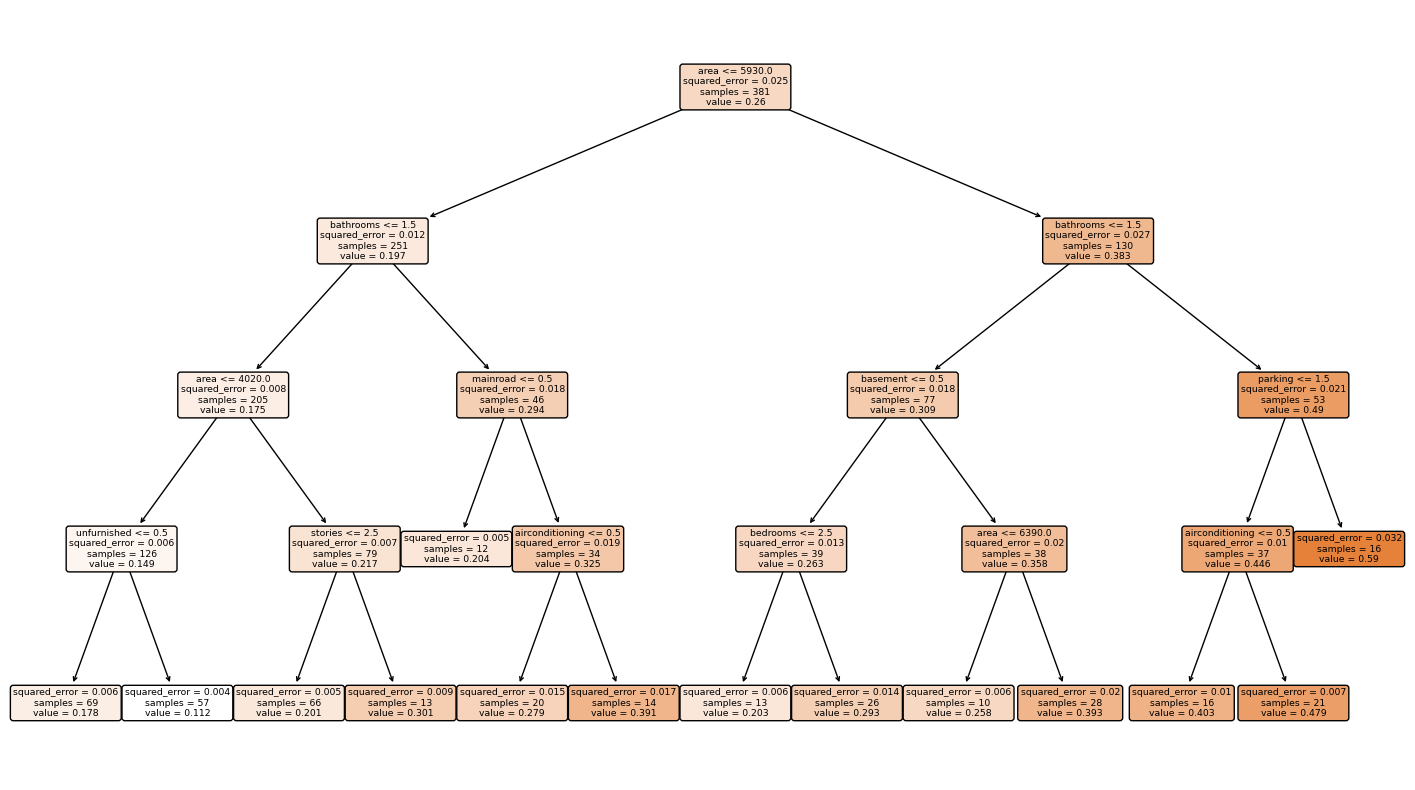

In [51]:
plt.figure(figsize=(18,10))
tree.plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

## Step 6: Making Predictions

In [52]:
y_train_pred = dt.predict(X_train)

In [53]:
y_test_pred = dt.predict(X_test)

## Step 7: Model Evaluation

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_train, y_train_pred)

0.6234560022579934

In [56]:
r2_score(y_test, y_test_pred)

0.5289772624972269